In [22]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy 
from sklearn.preprocessing import StandardScaler

In [25]:
df = pd.read_csv('1632560262896716.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df['Spending Score (1-100)'].isnull().sum()
le = LabelEncoder()
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])

# KMeans

In [ ]:
k_means = KMeans(init='k-means++', n_clusters = 4 , n_init = 12)
k_means.fit(df.drop('CustomerID', axis = 1))

In [28]:
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
df['Clus_km'] = k_means_labels

# hierarchy

In [29]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(df.drop('CustomerID', axis = 1),df.drop('CustomerID', axis = 1)) 

/tmp/ipykernel_13032/1844068657.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'ward')


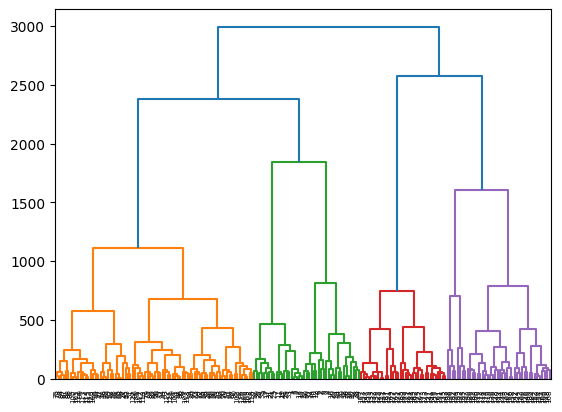

In [31]:
Z = hierarchy.linkage(dist_matrix, 'ward')
dendro = hierarchy.dendrogram(Z)

In [12]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'ward')
agglom.fit(dist_matrix)

/home/fatemeh/tutorials/clustering/projects/practice/venv/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


AgglomerativeClustering(n_clusters=6)

In [33]:
df['cluster_'] = agglom.labels_
# df.head(5)

/tmp/ipykernel_13032/424740345.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'],  c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'Spending Score (1-100)')

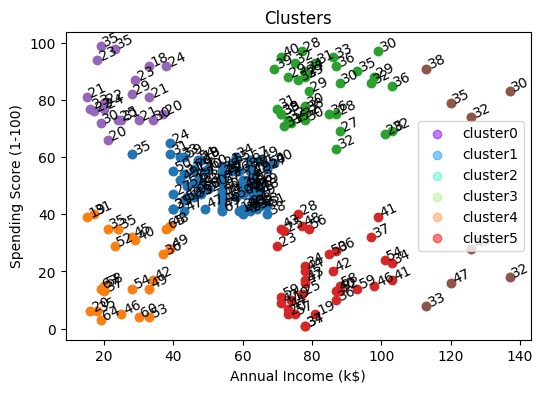

In [34]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset['Annual Income (k$)'][i], subset['Spending Score (1-100)'][i],str(subset['Age'][i]), rotation=25) 
    plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'],  c=color, label='cluster'+str(label),alpha=0.5)
    plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'])
plt.legend()
plt.title('Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
cluster_data = scaler.fit_transform(df)
db = DBSCAN(eps = 0.9, min_samples = 5).fit(cluster_data)
labels = db.labels_

In [ ]:
db.core_sample_indices_
db.components_

In [64]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
realClusterNum

9